# Algorytmy Genetyczne i sztuczne sieci neuronowe

## Budowanie generatora do testowania sieci WTM (ang. SOM (Self-organizing map))

Specyfikacja dotycząca generatora:
<ul>
<li>Liczba grup danych = 5</li>
<li>Rozmiar danych = 2D</li>
<li>Zakres danych [0:100 ; 0:100]</li>
<li>Liczba obiektów w danej grupie danych = 10</li>
<li>Promień każdej grupy = 5</li>
</ul>

Przykładowy wykres wygenerowanych danych poniżej:

<img src="WTM_model_example.png"> 

<font color='red'> UWAGA!!!:</font> Wyświetlanie danych powinno być znormalizowane do zapisu np. [72, 10; ...]. Każda współrzędna kolejna poprzedzona speratorem ,, ; ''

<font color='yellow'> PS: Mieszanie danych podczas uczenia np. w przypadku alfabetu uczenie (a,b,c,d,...), potem uczenie od (g,h,i,j,...). Różne  możliwości????</font>

### Importowanie potrzebnych bibliotek

In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [701]:
number_of_groups = 5    #Number of groups in model
radius = 5
number_of_object = 10   #Number of object in each group

In [702]:
def coordinate_generator_group(temp_lst):
    for element in temp_lst:
        temp_x_point = random.randint(0,100)    #Generate x and y coordinate for specific group
        temp_y_point = random.randint(0,100)    
        element[0] = temp_x_point               #Save points in list
        element[1] = temp_y_point

In [703]:
lst_groups = np.zeros((number_of_groups,2))    #Create a list of groups coordinates

coordinate_generator_group(lst_groups)    #Function to generate coordinates for groups

groups = pd.DataFrame(lst_groups, columns =['x', 'y'])        #Load data groups in DataFrame object
print(groups)

      x     y
0  89.0  74.0
1  24.0  48.0
2  65.0  22.0
3  71.0  69.0
4  34.0  50.0


In [720]:
def coordinate_generator_object(temp_lst, element_lst_groups):
        for element_temp_lst in temp_lst:
            r = radius * random.random()
            theta = 2 * math.pi *random.random()

            temp_x_point = element_lst_groups[0] + r * math.cos(theta)   #Generate x and y coordinate for specific group
            temp_y_point = element_lst_groups[1] + r * math.sin(theta)

            element_temp_lst[0] = temp_x_point
            element_temp_lst[1] = temp_y_point
        return temp_lst

In [726]:
temp_lst_objects = np.zeros((number_of_object,2))
lst_objects = []

for element_lst_groups in lst_groups:
    lst_objects = np.append(lst_objects, coordinate_generator_object(temp_lst_objects, element_lst_groups))

print(lst_objects)

objects = pd.DataFrame(lst_objects, columns =['x', 'y'])        #Load data groups in DataFrame object
#print(objects)

[88.04277094 73.51118532 84.58104039 73.06892234 90.33367186 76.04676318
 87.23567911 73.17208339 88.97343772 77.37722376 88.54753231 74.14645664
 91.93682998 73.57739752 89.09851555 74.11785117 90.46712575 77.25962343
 84.25237225 72.58510823 24.57888082 50.64484455 19.54998975 48.96870871
 23.6822817  50.52532872 20.12502682 44.93697629 24.7365654  44.26915321
 24.39575924 47.04093809 23.97246546 43.67494825 28.26856046 50.12729092
 24.65297723 47.80880491 19.71817495 49.88086032 65.60775144 21.21907123
 65.1183222  20.53187907 65.55139328 26.03412763 64.94155478 22.16560171
 64.46545247 18.70031679 64.89604882 21.90135857 63.68351377 24.28128978
 61.42086613 22.01041642 62.55614986 23.32443781 66.13917516 21.82719096
 71.8382399  70.55412119 72.42551183 65.27674944 72.34963018 68.68795005
 69.24512665 69.66378782 74.07877148 68.59638756 73.15251838 70.16742392
 74.83759681 68.26667757 66.80944782 70.60266357 70.72825627 69.03908816
 71.14186042 68.80667865 33.24750822 50.48833276 32

ValueError: Shape of passed values is (100, 1), indices imply (100, 2)

In [ ]:
def  createCircles(centre, radius):
    return plt.Circle((centre[0], centre[1]), radius, color='b', fill=False)

5


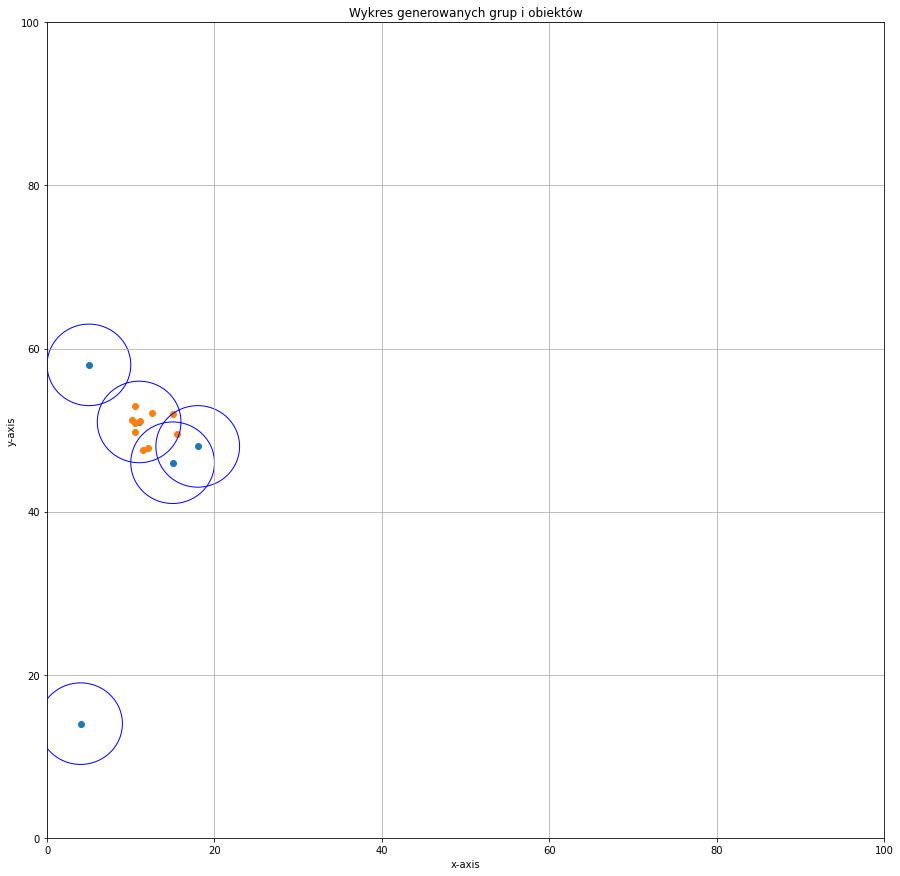

In [ ]:
# Creating a new figure 
fig, ax = plt.subplots(figsize=(15,15))

# Numpy array as scatter plot
plt.scatter(x=groups['x'],y=groups['y'])
plt.scatter(x=objects['x'],y=objects['y'])

print(len(lst_groups))

radius = 5
for item in lst_groups:
    ax.add_patch(createCircles(item, radius))

# Adding details to the plot
plt.title('Wykres generowanych grup i obiektów')
plt.xlabel('x-axis')
plt.ylabel('y-axis')

# Displaying the plot
plt.xlim(0,100)
plt.ylim(0,100)
plt.grid()
plt.show()